In [ ]:
using Pkg
Pkg.activate(".")

  Activating new project at `~/Code/TA3_Evaluation_Resources/climate`


# 3. (Low Complexity) Halfar Dome Unit Test
a. Refer to Section 8.1.1 Halfar dome in the CISM documentation. Extract the relevant
equations to model a dome of ice analytically. Further reading can be found at Halfar 1984 and in Buehler’s notes (provided as a file in the starter kit). Parts b and c are based off of the CISM documentation.

• The general shallow ice approximation (SIA) ice evolution equation is 𝛿𝐻 = ∇ ∙ 𝛿𝑡
(Γ𝐻𝑛+2|∇𝐻|𝑛−1∇𝐻).
• The Glen flow law exponent, n, is usually n = 3. G is defined as: Γ = 2/(n+2) * 𝐴(𝜌𝑔)𝑛/(𝑛+2)
• Set acceleration g = 9.8 m/s2, A = 1 x 10-16 Pa-3/s, and density r = 910 kg/m3,
1 73𝑅4 whicharethevaluesusedbyCISM.Wecandefine𝑡 = ( )   0.
• Using these definitions, the time dependent solution of the SIA using Halfar’s 
approximationis:𝐻(𝑡,𝑟)=𝐻0(𝑡0/t)^1/9 *[1-((r/R0)*(t0/t)^1/18)^4/3]^3/7

In [1]:
function halfar_dome(t, x, y, R0, H0, ρ, A=1e-16)
    n = 3.0
    grav = 9.8101
    alpha = 1.0/9.0
    beta = 1.0/18.0

    Gamma = 2.0/(n+2.0) * A * (ρ * grav)^n
  
    xcenter = 0.0
    ycenter = 0.0
  
    t0 = (beta/Gamma) * (7.0/4.0)^3 * (R0^4/H0^7)  # Note: this line assumes n=3!
    tr=(t+t0)/t0 
  
    H=zeros(length(y), length(x))
    for i in eachindex(x)
      for j in eachindex(y)
        r = sqrt((x[i]-xcenter)^2 + (y[j]-ycenter)^2)
        r=r/R0
        inside = max(0.0, 1.0 - (r / tr^beta)^((n+1.0) / n))
  
        H[i,j] = H0 * inside^(n / (2.0*n+1.0)) / tr^alpha
        end
    end
    return H
  
end

halfar_dome (generic function with 2 methods)

b. Using these equations, model a glacier with a range of initial radii and thicknesses at different time steps. What happens to thin glaciers as opposed to thick glaciers over time? How does the initial radius affect glacial evolution? The Halfar approximation is one approach to solving this, and reference code can be found in runHalfar.py, in the CISM repository.


In [2]:
r1max = 2*1000
r2max = 2*10000

r3max = 2*1000
r4max = 3*1000 + 500

3500

In [3]:
tmax = 1e6

t = range(0, tmax, length=1000)

x1 = range(-r1max, r1max, length=24)
y1 = range(-r1max, r1max, length=24)

x2 = range(-r2max, r2max, length=24)
y2 = range(-r2max, r2max, length=24)

x3 = range(-r3max, r3max, length=24)
y3 = range(-r3max, r3max, length=24)

x4 = range(-r4max, r4max, length=24)
y4 = range(-r4max, r4max, length=24)

H1 = [halfar_dome(dt, x1, y1, 1000, 100, 910) for dt in t]
H2 = [halfar_dome(dt, x2, y2, 10000, 1000, 910) for dt in t]
H3 = [halfar_dome(dt, x3, y3, 1000, 100, 910) for dt in t]
H4 = [halfar_dome(dt, x4, y4, 1000, 500, 910) for dt in t]


1000-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 ⋮
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0

┌ Info: Saved animation to /Users/alexjones/Code/TA3_Evaluation_Resources/climate/plots/halfar1.gif
└ @ Plots /Users/alexjones/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/Users/alexjones/Code/TA3_Evaluation_Resources/climate/plots/halfar1.gif")
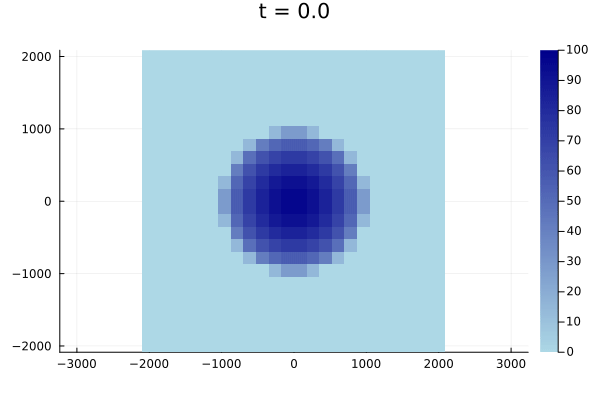

In [41]:
using Plots

anim = @animate for i in 1:length(t)
    heatmap(x1, y1, H1[i], aspect_ratio=:equal, c=:blues, clim=(0, 100), title="t = $(t[i])")
end

gif(anim, "plots/halfar1.gif", fps=15)

┌ Info: Saved animation to /Users/alexjones/Code/TA3_Evaluation_Resources/climate/plots/halfar2.gif
└ @ Plots /Users/alexjones/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/Users/alexjones/Code/TA3_Evaluation_Resources/climate/plots/halfar2.gif")
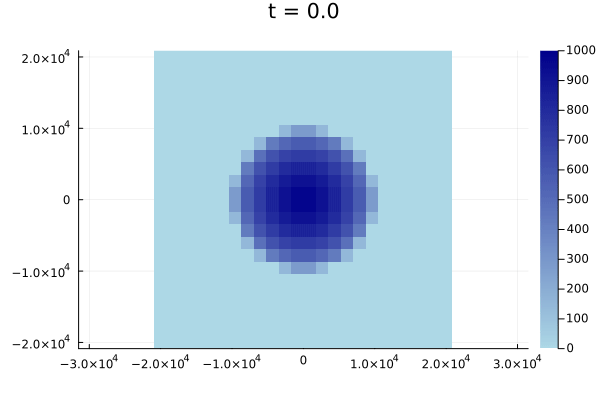

In [42]:
anim = @animate for i in 1:length(t)
    heatmap(x2, y2, H2[i], aspect_ratio=:equal, c=:blues, clim=(0, 1000), title="t = $(t[i])")
end

gif(anim, "plots/halfar2.gif", fps=15)

Larger radius with same aspect ratio seems to lead to the dome to flow over a larger relative area

┌ Info: Saved animation to /Users/alexjones/Code/TA3_Evaluation_Resources/climate/halfar3.gif
└ @ Plots /Users/alexjones/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/Users/alexjones/Code/TA3_Evaluation_Resources/climate/halfar3.gif")
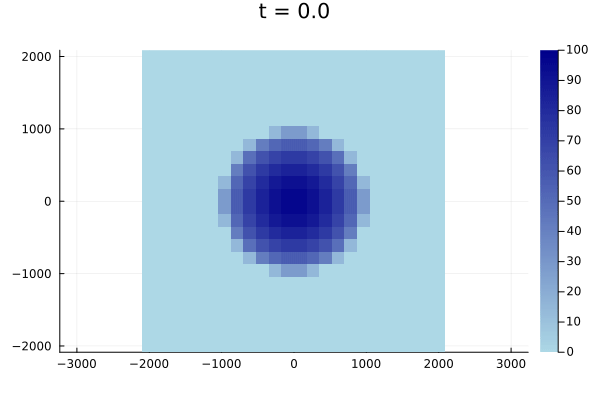

In [43]:
anim = @animate for i in 1:length(t)
    heatmap(x3, y3, H3[i], aspect_ratio=:equal, c=:blues, clim=(0, 100), title="t = $(t[i])")
end

gif(anim, "halfar3.gif", fps=15)

┌ Info: Saved animation to /Users/alexjones/Code/TA3_Evaluation_Resources/climate/plots/halfar4.gif
└ @ Plots /Users/alexjones/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/Users/alexjones/Code/TA3_Evaluation_Resources/climate/plots/halfar4.gif")
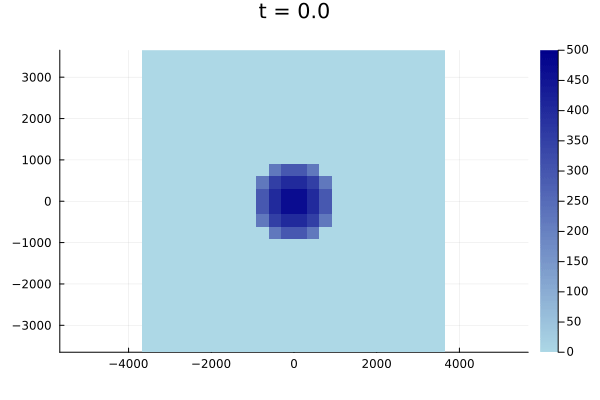

In [44]:
anim = @animate for i in 1:length(t)
    heatmap(x4, y4, H4[i], aspect_ratio=:equal, c=:blues, clim=(0, 500), title="t = $(t[i])")
end

gif(anim, "plots/halfar4.gif", fps=15)

A larger height leads to spreading on much faster timescales

d. Now redo 3b, but numerically solve SIA with finite difference equations. You can use this notebook as a reference for one way to do this. As an extension, model a sloped bed instead of a flat bed ice sheet. What is the impact of using a sloped bed versus a flat bed?

Let's solve with MTK and MOL

In [4]:
using MethodOfLines, DomainSets, ModelingToolkit, OrdinaryDiffEq, Interpolations, DiffEqOperators

In [5]:

function fd_halfar_dome_sys((xmin, xmax), (ymin, ymax), H0, ρ, A=1e-16)
    @parameters x, y, t

    @variables H(..) inHx(..) inHy(..)

    Dx = Differential(x)
    Dy = Differential(y)
    Dt = Differential(t)
    Dxx = Differential(x)^2
    Dyy = Differential(y)^2

    n = 3.0
    grav = 9.8101
    A = 1e-16
    ρ = 910.0

    Γ = 2.0/(n+2.0) * A * (ρ * grav)^n

    eqs = [Dt(H(t,x,y)) ~ Dx(inHx(t, x, y)) +  Dy(inHy(t, x, y)),
    inHx(t, x, y) ~ Γ*H(t, x, y)^(n+2)*(abs(Dx(H(t, x, y)))^(n-1))*Dx(H(t, x, y)),
    inHy(t, x, y) ~ Γ*H(t, x, y)^(n+2)*(abs(Dy(H(t, x, y)))^(n-1))*Dy(H(t, x, y))]

    
    
    bcs = [H(0.0, x, y) ~ H0(x, y),
           H(t, xmin, y) ~ 0.0,
           H(t, xmax, y) ~ 0.0,
           H(t, x, ymin) ~ 0.0,
           H(t, x, ymax) ~ 0.0]

    domains = [x ∈ IntervalDomain(xmin, xmax),
               y ∈ IntervalDomain(ymin, ymax),
               t ∈ IntervalDomain(0.0, 1.0e6)]

    @named pdesys = PDESystem(eqs, bcs, domains, [x, y, t], [H(t, x, y)])

    return pdesys
end


fd_halfar_dome_sys (generic function with 2 methods)

In [6]:
@register_symbolic H01(x, y)
itp = interpolate(H1[1], BSpline(Cubic(Line(OnGrid()))))
sitp = scale(itp, x1, y1)
H01(xx,yy) = sitp(xx,yy)

#! Need to get the BCs for aux variables 
function innercalc(H0, x, y, A)
    Dx = CenteredDifference{1}(1, 2, x1, length(x1))
    Dy = CenteredDifference{1}(1, 2, y1, length(y1))

    Qx = Dirichlet0BC{1}(Float64, length.((x1, y1)))
    Qy = Dirichlet0BC{1}(Float64, length.((x1, y1)))

    Ax = Dx*Qx
    Ay = Dy*Qy

    inHx0=_innercalc(H0, Ax)



H1_pdesys = fd_halfar_dome_sys((-r1max, r1max), (-r1max, r1max), H01, 910)

@register_symbolic H02(x, y)
itp = interpolate(H2[1], BSpline(Cubic(Line(OnGrid()))))
sitp = scale(itp, x2, y2)
H02(xx,yy) = sitp(xx,yy)#
H2_pdesys = fd_halfar_dome_sys((-r2max, r2max), (-r2max, r2max), H02, 910)

@register_symbolic H03(x, y)
itp = interpolate(H3[1], BSpline(Cubic(Line(OnGrid()))))
sitp = scale(itp, x4, y4)
H03(xx,yy) = sitp(xx,yy)
H3_pdesys = fd_halfar_dome_sys((-r3max, r3max), (-r3max, r3max), H03, 910)

@register_symbolic H04(x, y)
itp = interpolate(H4[1], BSpline(Cubic(Line(OnGrid()))))
sitp = scale(itp, x4, y4)
H04(xx,yy) = sitp(xx,yy)
H4_pdesys = fd_halfar_dome_sys((-r4max, r4max), (-r4max, r4max), H04, 910)

PDESystem
Equations: Equation[Differential(t)(H(t, x, y)) ~ Differential(x)(2.8458006323660875e-5(abs(Differential(x)(H(t, x, y)))^2.0)*(H(t, x, y)^5.0)*Differential(x)(H(t, x, y))) + Differential(y)(2.8458006323660875e-5(abs(Differential(y)(H(t, x, y)))^2.0)*(H(t, x, y)^5.0)*Differential(y)(H(t, x, y)))]
Boundary Conditions: Equation[H(0.0, x, y) ~ H04(x, y), H(t, -3500, y) ~ 0.0, H(t, 3500, y) ~ 0.0, H(t, x, -3500) ~ 0.0, H(t, x, 3500) ~ 0.0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, -3500..3500), Symbolics.VarDomainPairing(y, -3500..3500), Symbolics.VarDomainPairing(t, 0.0..1.0e6)]
Dependent Variables: Num[H(t, x, y)]
Independent Variables: Num[x, y, t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [7]:
@parameters t x y

discretization = MOLFiniteDifference([x => 24, y => 24], t, advection_scheme = WENOScheme())

prob1 = discretize(H1_pdesys, discretization)
prob2 = discretize(H2_pdesys, discretization)

prob3 = discretize(H3_pdesys, discretization)
prob4 = discretize(H4_pdesys, discretization)

sys = PDESystem(Equation[Differential(t)(H(t, x, y)) - Differential(x)(2.8458006323660875e-5(abs(Differential(x)(H(t, x, y)))^2.0)*(H(t, x, y)^5.0)*Differential(x)(H(t, x, y))) - Differential(y)(2.8458006323660875e-5(abs(Differential(y)(H(t, x, y)))^2.0)*(H(t, x, y)^5.0)*Differential(y)(H(t, x, y))) ~ 0], Equation[H(0.0, x, y) ~ H01(x, y), H(t, -2000, y) ~ 0.0, H(t, 2000, y) ~ 0.0, H(t, x, -2000) ~ 0.0, H(t, x, 2000) ~ 0.0], Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, -2000..2000), Symbolics.VarDomainPairing(y, -2000..2000), Symbolics.VarDomainPairing(t, 0.0..1.0e6)], Num[x, y, t], Num[H(t, x, y)], SciMLBase.NullParameters(), Dict{Any, Any}(), nothing, Any[], nothing, nothing, :pdesys, nothing, nothing)


AssertionError: AssertionError: Only first order spatial derivatives are implemented for functional schemes.